In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
red=pd.read_csv('winequality-red.csv',sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Dectecting outliers which are defined as outside of lower and upper whisker in the box plot
from collections import Counter

def outliers(df, variables, n):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        outliers_temp = (df[(df[col] < lower - IQR * 3)|(df[col] > upper + IQR * 3)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return(multiple_outliers)   

col_list = list(red.columns.values)
Outliers_to_drop = outliers(red, col_list, 0)
print(Outliers_to_drop)
new_df = red.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

[442, 554, 555, 557, 652, 1299, 9, 11, 33, 35, 39, 40, 57, 154, 155, 156, 157, 163, 164, 215, 274, 278, 279, 283, 324, 325, 353, 364, 366, 378, 396, 400, 413, 415, 455, 480, 494, 501, 502, 515, 538, 539, 541, 595, 608, 624, 625, 645, 649, 705, 889, 903, 904, 911, 917, 923, 941, 974, 1038, 1043, 1071, 1074, 1077, 1078, 1079, 1081, 1094, 1096, 1133, 1147, 1176, 1186, 1203, 1235, 1244, 1257, 1276, 1358, 1388, 1406, 1412, 1434, 1435, 1437, 1441, 1445, 1474, 1476, 1478, 1558, 1574, 1577, 1589, 14, 15, 17, 19, 38, 42, 81, 83, 106, 120, 147, 151, 169, 181, 226, 240, 258, 281, 291, 303, 307, 308, 368, 408, 451, 482, 483, 517, 549, 566, 567, 568, 666, 689, 692, 730, 754, 773, 774, 776, 777, 780, 808, 882, 916, 1051, 1098, 1109, 1146, 1165, 1191, 1193, 1260, 1319, 1334, 1370, 1371, 1372, 1374, 1436, 1570, 1316, 1321, 13, 86, 91, 92, 339, 614, 639, 723]


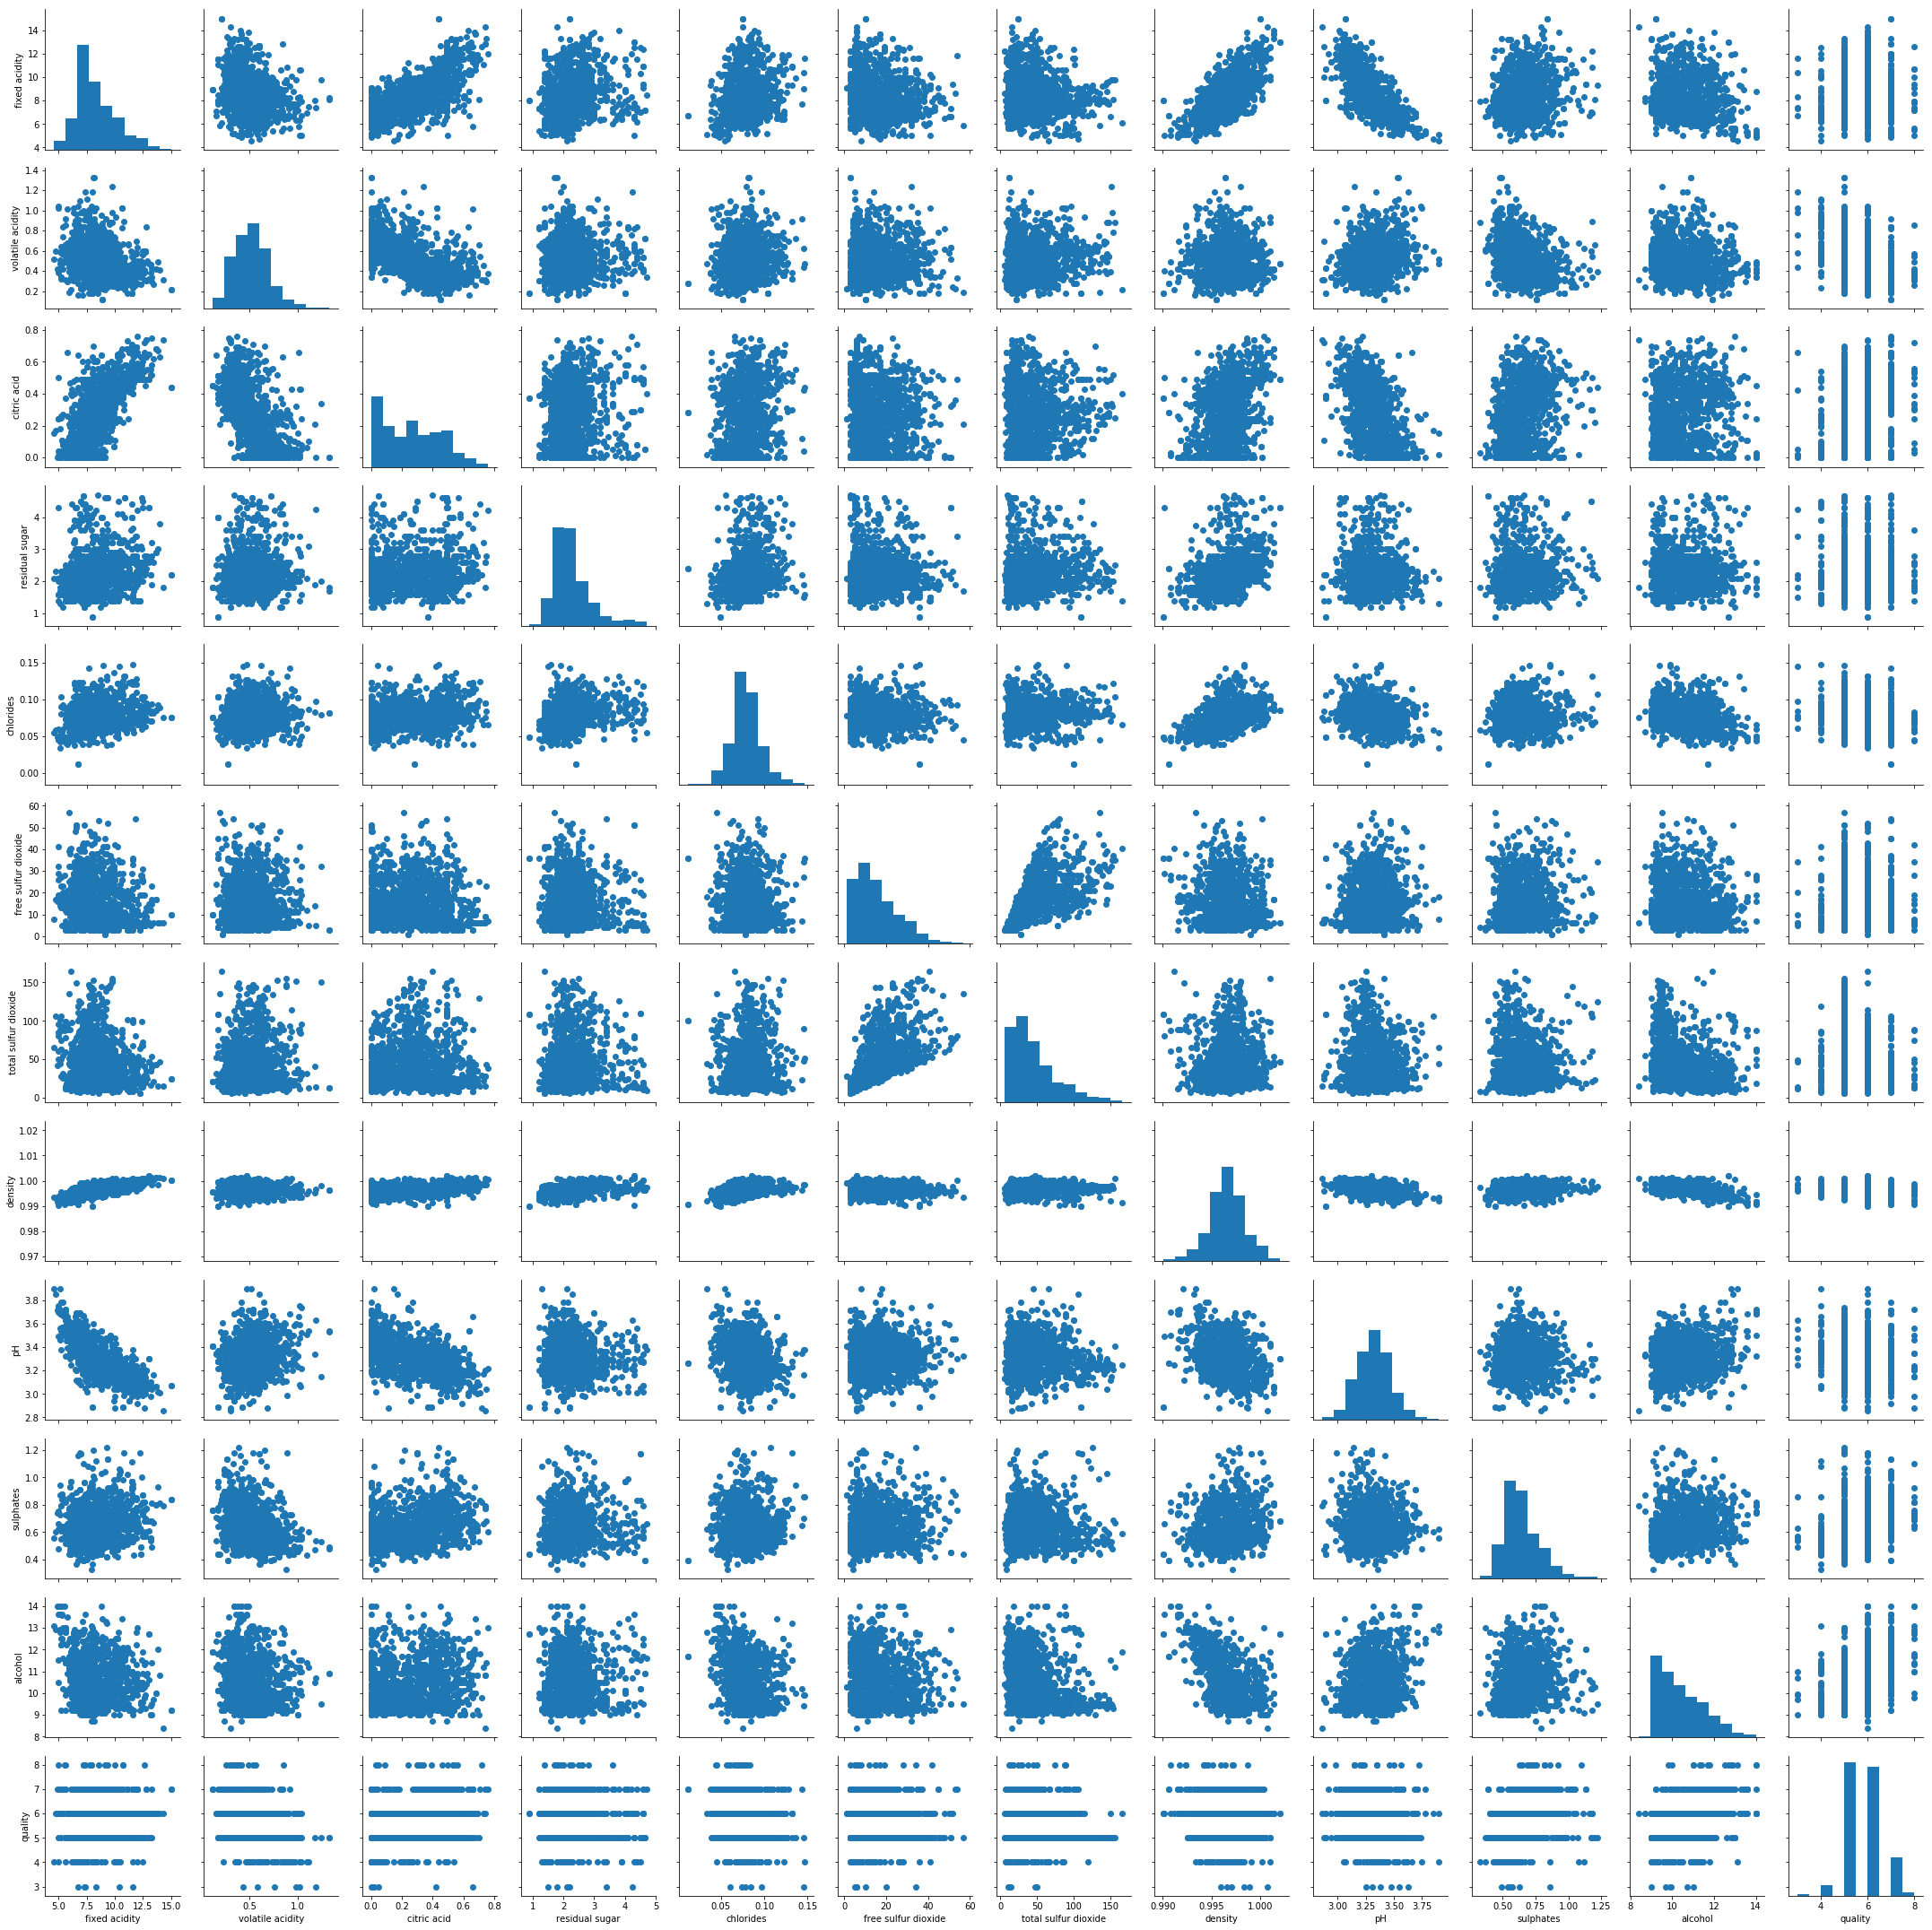

In [5]:
ax = sns.PairGrid(new_df)
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)

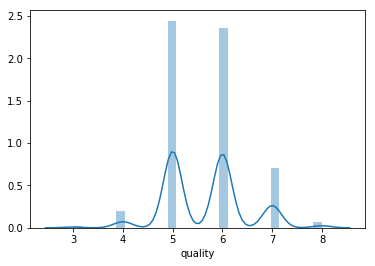

In [6]:
sns.distplot(new_df['quality'])

In [7]:
X=new_df.drop(columns=['quality'])
y=new_df['quality']
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create scaler: scaler - standard works better here.
scaler = StandardScaler()
#scaler = Normalizer()

# Create PCA instance: model
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [9]:
npc = 8
pca = PCA(n_components=npc, copy=True)
X_standardized=scaler.fit_transform(X)
X_transformed = pca.fit_transform(X_standardized)

In [10]:
# 3 levels
tiers = []
for i in new_df['quality']:
    if i >= 1 and i <= 5:
        tiers.append(1)
    elif i ==6:
        tiers.append(2)
    elif i >= 7 and i <= 10:
        tiers.append(3)
new_df['tier'] = tiers

In [11]:
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [12]:
X=new_df.drop(columns=['quality', 'tier'])
y=new_df['tier']
X.head()


# using the AgeBins and FareBins data here
X_train,X_test,y_train,y_test=train_test_split(X_transformed,
                                               y,
                                               stratify =y, 
                                               test_size=0.2,
                                               random_state=0)



In [50]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression



# using the AgeBins and FareBins data here
#X_train,X_test,y_train,y_test=train_test_split(X_transformed,red['tier'],test_size=0.2,random_state=0)


C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0,criterion='entropy')
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
nb = GaussianNB()
# perceptron 
per = Perceptron()
# knn 
knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
log_model = LogisticRegression()

models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada]
names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting']
               #'VotingClassifier'
reports=[]
f1_score=[]
precision=[]
recall=[]

for model in models: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred)
    print(report)
    #reports.append(report)
    #f1_score.append(report['weighted avg']['f1-score'])
    #precision.append(report['weighted avg']['precision'])
    #recall.append(report['weighted avg']['recall'])

              precision    recall  f1-score   support

           1       0.65      0.90      0.76       132
           2       0.57      0.44      0.49       117
           3       0.57      0.21      0.31        38

    accuracy                           0.62       287
   macro avg       0.60      0.52      0.52       287
weighted avg       0.61      0.62      0.59       287

              precision    recall  f1-score   support

           1       0.68      0.87      0.77       132
           2       0.57      0.47      0.51       117
           3       0.50      0.29      0.37        38

    accuracy                           0.63       287
   macro avg       0.58      0.54      0.55       287
weighted avg       0.61      0.63      0.61       287

              precision    recall  f1-score   support

           1       0.65      0.92      0.76       132
           2       0.57      0.46      0.51       117
           3       0.67      0.11      0.18        38

    accuracy        

In [51]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=metrics.classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.74      0.69      0.71       132
           2       0.56      0.60      0.58       117
           3       0.54      0.55      0.55        38

    accuracy                           0.63       287
   macro avg       0.61      0.61      0.61       287
weighted avg       0.64      0.63      0.64       287



In [15]:
print(report[0])

In [89]:
  # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred)
    reports.append(report)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])

IndentationError: unexpected indent (<ipython-input-89-9228c10df4ca>, line 2)